In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from glob import glob

from astropy.coordinates import Distance
from astropy import units as u

## On Axis

In [2]:
def Mag_dist(x):
    mu = 15.35
    sig = 1.59
    g = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2* ((x-mu)/sig)**2 )
    return g

def Lifetime(Lim, x):
    mag = Mag_dist(x)
    time = 10**((Lim-x)/2.5)
    return time
def M_0_lim(Lim,Time):
    return Lim - 2.5*np.log10(Time)

In [7]:
x = np.arange(10,22,0.1)
y = Mag_dist(x)

<IPython.core.display.Javascript object>


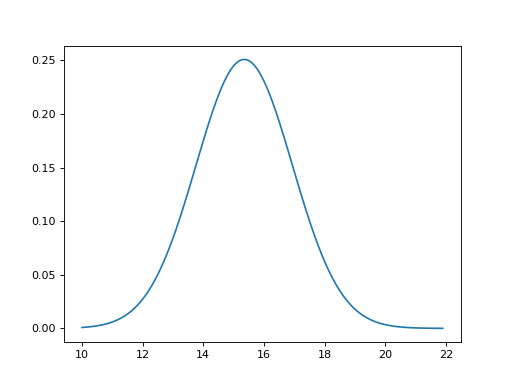

In [8]:
plt.figure()
plt.plot(x,y)

<IPython.core.display.Javascript object>


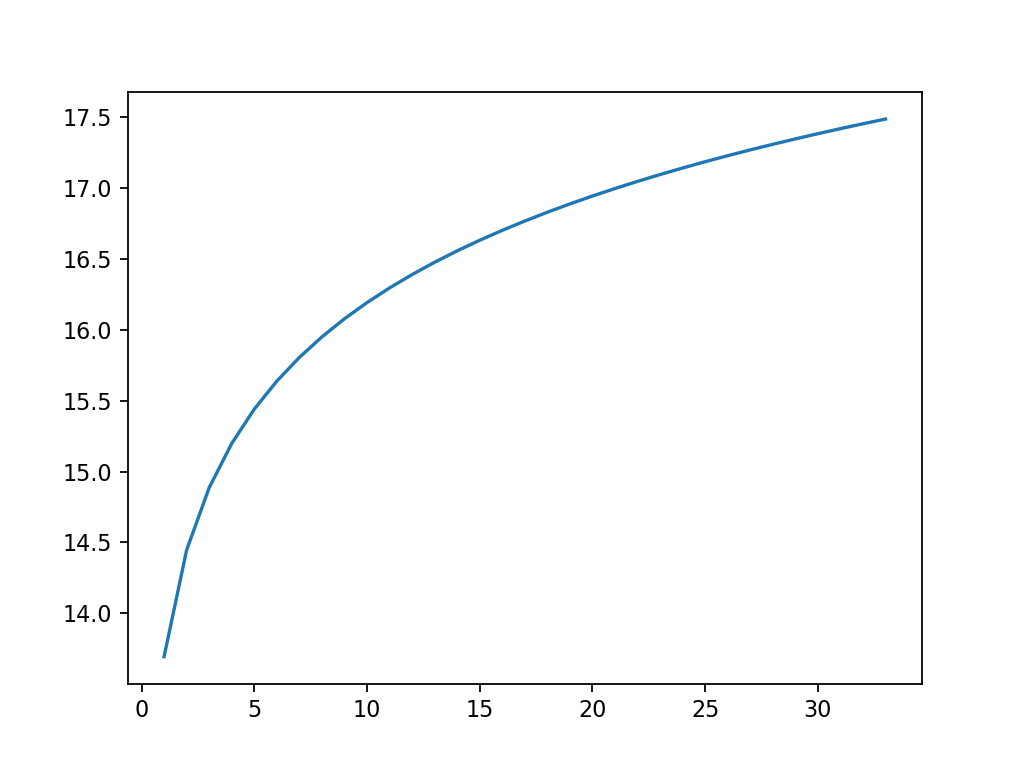

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
t = np.arange(0,1000,30)
plt.figure()
plt.plot(10+2.5*np.log10(t))
#plt.ylim(15,10)

In [16]:
life = Lifetime(21,x)

<IPython.core.display.Javascript object>


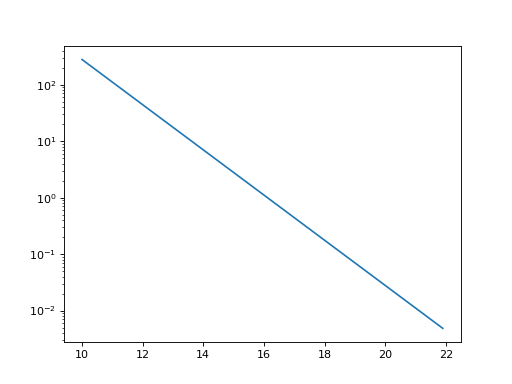

In [20]:
plt.figure()
plt.semilogy(x,life/90)

In [22]:
M_0_lim(21,90)

16.114393726401687

In [23]:
import scipy.integrate as integrate

/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
integrate.quad(lambda x: Mag_dist(x),-np.inf,16)

(0.6586586263939984, 6.8969523553507e-09)

In [144]:
def GRB_prob(Lim,Time):
    """
    Calculate the probability that the GRB is observed.
    Inputs:
    -------
    Lim  - float, limiting magnitude
    Time - float, detection time in minutes
    
    Output:
    -------
    CDF - float, probability the random GRB is detectable
    """
    m0_lim = M_0_lim(Lim,Time)
    #plt.figure()
    #plt.hist(m0_lim.flatten(),bins =100)
    CDF = 1/2*(1+erf((m0_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [145]:
GRB_prob(mag,90)

array([[6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02

In [149]:
def GRB_rate(Limit,Duration):
    """
    Calculate the expected number of detected GRBs for a given Kepler pixel.
    
    Inputs:
    -------
    Limit    - float, Kepler magnitude limit for a pixel
    Duration - float, duration of the K2 campaign in days
    
    Output:
    -------
    numbers - float, expected number of observed GRBs
    """
    rate = 300 / 365 / 41253 # GRB / day / deg2
    pix_area = (4 / 60 / 60)**2 # deg2
    if type(Limit) != int:
        pix_area = pix_area * Limit.shape[0] * Limit.shape[1]
    Duration = Duration / 365 # yr
    lifetime = 90 # min for 3 Kepler frames
    
    prob = GRB_prob(Limit,lifetime)
    
    number = rate * pix_area * Duration * prob
    
    return number
    

In [164]:
def Total_GRB_rate(Folder,Duration):
    """
    Calculate the expected number of GRBs observed in a K2 campaign.
    
    Inputs:
    -------
    Folder   - str, directory with limit frames 
    Duration - float, duration of the K2 campaign in days
    
    Output:
    numbers - float, expected number of observed GRBs
    """
    files = glob(Folder + '*.npy')
    numbers = 0.0
    for file in files:
        arr = np.load(file)
        data = arr[0] + arr[1]
        mag = -2.5*np.log10(data) + 24.47
        num = GRB_rate(mag,Duration)
        numbers += np.nansum(num)
    return numbers


In [161]:
from tqdm import trange
path = '../../Data/Limit/c01/Limit/'

In [162]:
c01_number = Total_GRB_rate(path, 81)


  0%|          | 0/18529 [00:00<?, ?it/s]/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10

 68%|██████▊   | 12557/18529 [00:33<00:39, 152.12it/s]


100%|█████████▉| 18527/18529 [00:49<00:00, 472.39it/s]
                                                      

In [163]:
c01_number

0.00701056203704275

In [165]:
paths = glob('../../Data/Limit/c*/Limit/')

In [167]:
numbers = []
durations = [83,79,80,81,81,81,69]
for i in range(len(paths)):
    num = Total_GRB_rate(paths[i],durations[i])
    numbers += [num]

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [168]:
numbers

[0.007183662334253732,
 0.0019878162561089616,
 0.001869577018689066,
 0.0033741466490449343,
 0.0025627653282209676,
 0.0016587153869442785,
 0.002674380019483431]

In [169]:
np.nansum(numbers)

0.02131106299274537

In [78]:
np.isfinite(mag).shape

(22, 23)

In [97]:
[1].shape

AttributeError: 'list' object has no attribute 'shape'

In [81]:
ind[1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18

<IPython.core.display.Javascript object>


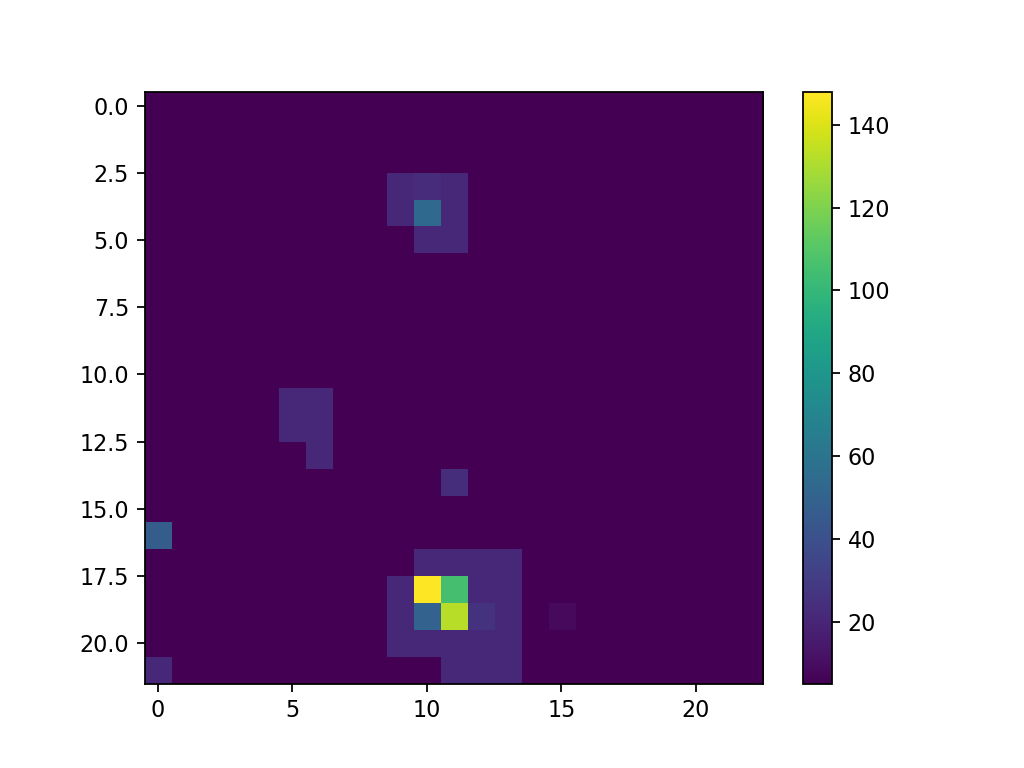

In [60]:
plt.figure()
plt.imshow(d[0]+d[1])
plt.colorbar()

In [98]:
data =d[0]+d[1] 

In [104]:
mag = M_0_lim(-2.5*np.log10(data) + 24.47,90)

In [150]:
GRB_rate(mag,80)

array([[1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10

In [107]:
from scipy.special import erf

In [110]:
1/2*(1-erf(x-mu/(sig*np.sqrt(2))))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1.,

In [127]:
def hack_prob(GRB_mag_lim):
    mu = 15.35
    sig = 1.59
    CDF = 1/2*(1+erf((GRB_mag_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [129]:
hack_prob(mag)

array([[0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.93272415, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.940

In [124]:
mu = 15.35
sig = 1.59
CDF = 1/2*(1+erf(mag-mu/(sig*np.sqrt(2))))

<IPython.core.display.Javascript object>


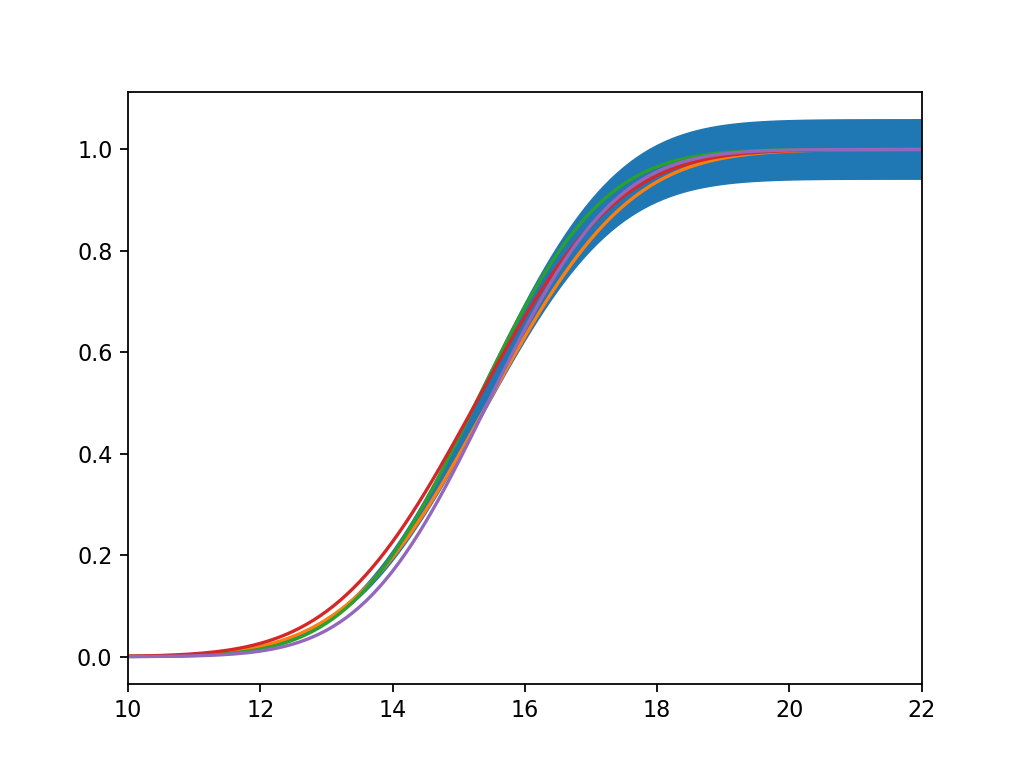

(10, 22)

In [198]:
x = np.arange(0,30,0.1)
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))
#plt.fill_between(x,s-0.06*s,s+0.06*s)
plt.xlim(10,22)

<IPython.core.display.Javascript object>


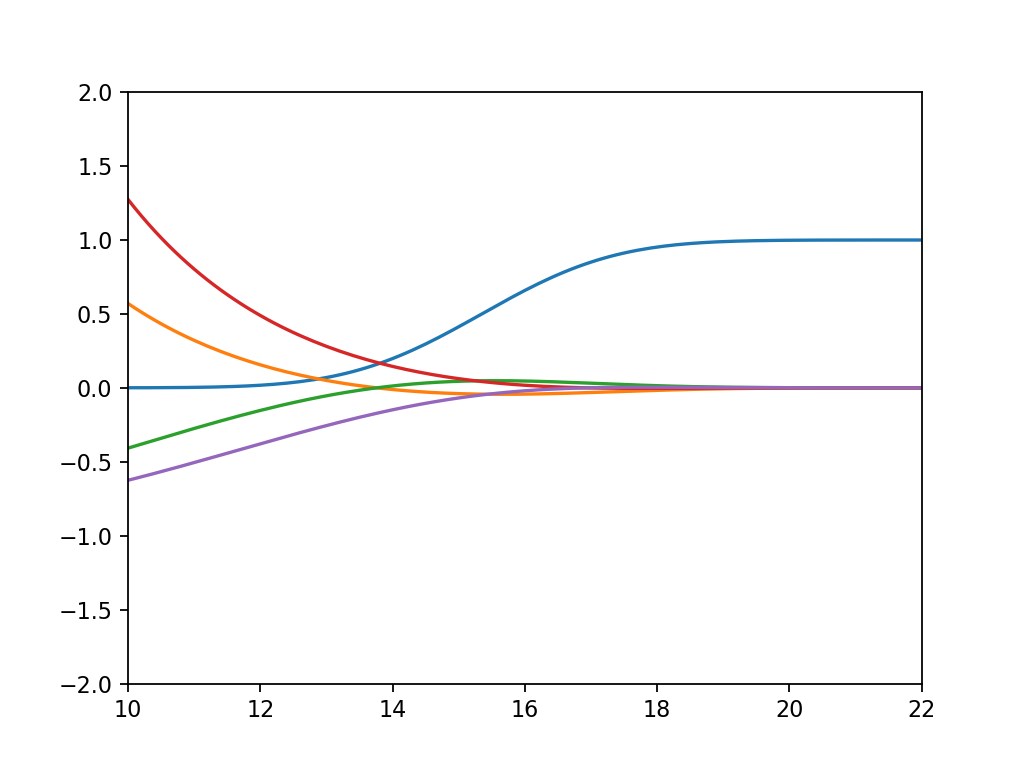

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(-2, 2)

In [182]:
x = np.arange(0,30,0.1)
s = 1/2*(1+erf((x-mu)/(sig*np.sqrt(2))))
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.xlim(10,22)
plt.ylim(-2,2)

In [199]:
300/41253

0.007272198385571959

# Off axis 

turn off spreading, lorentz factor 1000 - Geoff Ryan

In [118]:
import numpy as np
import afterglowpy as grb
from astropy.cosmology import WMAP9 as cosmo

jetType = -1     # top hat jet

thetaObs = 0.1  # Viewing angle in radians
E0 = 1.0e53      # Isotropic-equivalent energy in erg
thetaC = 0.051     # Half-opening angle in radians
thetaW = 0.1     # Truncation angle, unused for top-hat
b = 0            # power law index, unused for top-hat
n0 = 0.1         # circumburst density in cm^{-3}
p = 2.2          # electron energy distribution index
eps_e = 0.1      # epsilon_e
eps_B = 0.01     # epsilon_B
xi_N = 1.0       # Fraction of electrons accelerated
z = 3         # redshift
dL = cosmo.luminosity_distance(z).to(u.cm).value      # Luminosity distance in cm


# Space time points geometrically, from 10^3 s to 10^7 s
t = np.geomspace(1.0e0, 1.0e7, 100)

# Calculate flux in a single X-ray band (all times have same frequency)
nu = np.empty(t.shape)
nu[:] = 5.19e14

# For convenience, place positional arguments in an array,
# and keywords into a dict

Y = np.array([thetaObs, E0, thetaC, thetaW, b, 0, 0, 0,
              n0, p, eps_e, eps_B, xi_N, dL])
Z = {'z': z, 'spread':False,'g0':1000}

# Calculate!

Fnu = grb.fluxDensity(t, nu, jetType, 0, *Y, **Z) * u.mJy # give it units
Fnu = Fnu.to(u.erg / u.s/ u.cm**2 / u.Hz).value # convert to cgs
mag2 = -2.5*np.log10(Fnu) - 48.6 # calculate mag

<IPython.core.display.Javascript object>


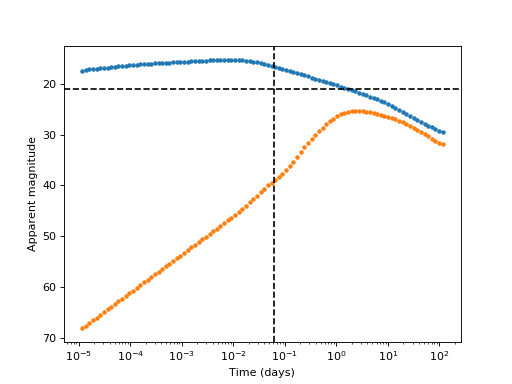

Text(0.5, 0, 'Time (days)')

In [119]:
#plt.figure()
#plt.loglog(t,Fnu)

plt.figure()
plt.semilogx(t/(60**2 * 24),mag,'.')
plt.semilogx(t/(60**2 * 24),mag2,'.')
plt.axhline(21,ls='--',color='k')
plt.axvline(3/48,ls='--',color='k')
plt.gca().invert_yaxis()
plt.ylabel('Apparent magnitude')
plt.xlabel('Time (days)')

In [5]:
from tqdm import trange

In [126]:
np.pi/2

1.5707963267948966

In [224]:
global zz, t, nu
vangles = np.arange(.052,1.5,.01) # in radians from 0 to 90 deg
zz = np.arange(.01,10,.01)
#t = np.geomspace(1.0e2, 1.0e7, 300)
t = np.arange(60**2*2,1e7,24*60**2)
nu = np.empty(t.shape)
nu[:] = 5.19e14
mags = np.zeros((len(vangles),len(zz),len(t)))


In [164]:
t.shape

(116,)

In [121]:
vangles.shape

(49,)

In [74]:
zz.shape

(999,)

In [71]:
mags.shape

(30, 999, 300)

In [122]:

def grbmag(index):
    temp = np.zeros((len(zz),len(t)))
    Z = {'z': zz[index]}#, 'spread':False,'g0':1000}
    dL = cosmo.luminosity_distance(zz[index]).to(u.cm).value
    #thetaObs = vangles[index]
    Y = np.array([thetaObs, E0, thetaC, thetaW, b, 0, 0, 0,
              n0, p, eps_e, eps_B, xi_N, dL])
    # Calculate!
    Fnu = grb.fluxDensity(t, nu, jetType, 0, *Y, **Z) * u.mJy # give it units
    Fnu = Fnu.to(u.erg / u.s/ u.cm**2 / u.Hz).value # convert to cgs
    #print(temp.shape)
    temp[index] = -2.5*np.log10(Fnu) - 48.6 # calculate mag
    return temp
    

In [123]:
from schwimmbad import MultiPool

In [225]:
ind = np.arange(0,len(zz))
for i in trange(len(vangles),leave=True):
    thetaObs = vangles[i]    
    pool = MultiPool()
    values = list(pool.map(grbmag, ind))
    pool.close()
    values = np.array(values)
    mags[i] = np.nansum(values,axis=0)
        
        

        



  0%|          | 0/145 [00:00<?, ?it/s]

  1%|          | 1/145 [00:24<58:14, 24.27s/it]

  1%|▏         | 2/145 [01:00<1:06:38, 27.96s/it]

  2%|▏         | 3/145 [01:39<1:14:03, 31.29s/it]

  3%|▎         | 4/145 [01:57<1:03:51, 27.17s/it]

  3%|▎         | 5/145 [02:13<55:44, 23.89s/it]  

  4%|▍         | 6/145 [02:29<49:32, 21.39s/it]

  5%|▍         | 7/145 [02:44<44:57, 19.55s/it]

  6%|▌         | 8/145 [03:03<44:04, 19.31s/it]

  6%|▌         | 9/145 [03:23<44:14, 19.52s/it]

  7%|▋         | 10/145 [03:39<41:29, 18.44s/it]

  8%|▊         | 11/145 [03:54<38:45, 17.36s/it]

  8%|▊         | 12/145 [04:08<36:39, 16.54s/it]

  9%|▉         | 13/145 [04:23<34:58, 15.90s/it]

 10%|▉         | 14/145 [04:37<33:34, 15.38s/it]

 10%|█         | 15/145 [04:51<32:20, 14.93s/it]

 11%|█         | 16/145 [05:04<31:09, 14.49s/it]

 12%|█▏        | 17/145 [05:19<31:24, 14.72s/it]

 12%|█▏        | 18/145 [05:34<31:11, 14.74s/it]

 13%|█▎        | 19/145 [05:47<29:58, 14.28s/it]

 14%|█▍ 

100%|██████████| 145/145 [24:56<00:00, 10.32s/it]


In [144]:
beep = np.where(np.nanmin(mags,axis=-1) > 22)

In [139]:
test = mags.copy()
test[beep] = np.nan

In [153]:
beep = np.where((mags-22) < 0)

In [154]:
beep

(array([0, 0, 0, ..., 5, 5, 5]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([  0,   1,   2, ..., 297, 298, 299]))

In [146]:
test[1,28]

array([71.35401418, 71.08227487, 70.81053547, 70.53879621, 70.26705789,
       69.99531821, 69.72357874, 69.45184002, 69.180101  , 68.9083614 ,
       68.63662214, 68.36488382, 68.0931442 , 67.82140477, 67.54966581,
       67.27792707, 67.00618736, 66.73444803, 66.46270964, 66.1909701 ,
       65.91923068, 65.64749152, 65.37575307, 65.1040133 , 64.83227386,
       64.56053525, 64.28879597, 64.01705649, 63.74531719, 63.47357884,
       63.20183913, 62.93009961, 62.65836079, 62.38662178, 62.11488209,
       61.84314276, 61.57140437, 61.29966469, 61.02792519, 60.75618612,
       60.48444736, 60.21270755, 59.94096811, 59.6692296 , 59.39749   ,
       59.12575047, 58.85401116, 58.58227264, 58.31053274, 58.03879315,
       57.76705435, 57.49531498, 57.22357529, 56.95183583, 56.68009731,
       56.40835744, 56.13661772, 55.86487863, 55.59313946, 55.32139952,
       55.04965994, 54.77792127, 54.50618134, 54.23444156, 53.96270214,
       53.69096312, 53.41922297, 53.14748315, 52.87574421, 52.60

<IPython.core.display.Javascript object>


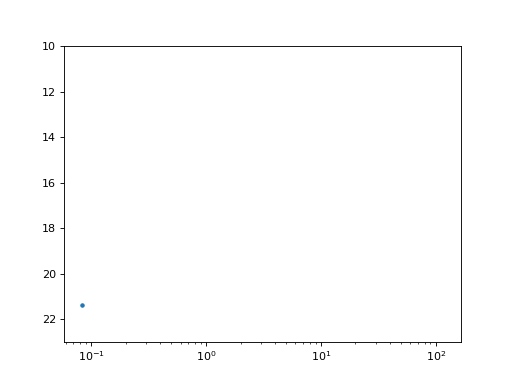

(23, 10)

In [215]:
plt.figure()
for i in range(mags.shape[0]):
    plt.semilogx(t/(60**2 * 24),mags[i,800,:],'.')
plt.gca().invert_yaxis()
plt.ylim(23,10)

In [231]:
magrange = np.arange(10,22.1,0.1)
magrange = magrange[::-1]
Lim = np.zeros((mags.shape[:2])) * np.nan
for i in range(magrange.shape[0]):
    boo = mags.copy()
    l = (boo-magrange[i]) < 0
    ind = np.where(np.nansum(l,axis=-1)>=1)
    Lim[ind] = magrange[i]
    

<IPython.core.display.Javascript object>


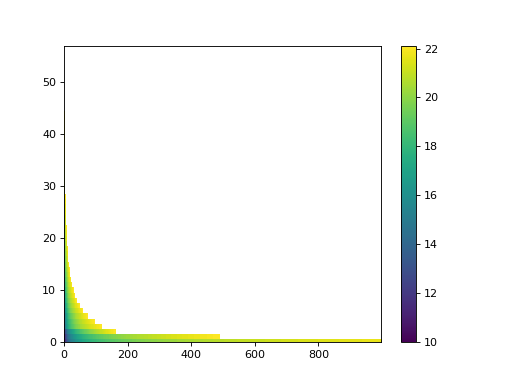

(0, 57)

In [234]:
plt.figure()
plt.imshow(Lim,aspect='auto',origin='lower')
plt.colorbar()
plt.ylim(0,57)

In [230]:
np.save('GRB_LCs_n0_1.npy',mags)

In [ ]:
for i in trange(len(vangles),leave=False):
    for j in range(len(zz)):

        dL = cosmo.luminosity_distance(zz[j]).to(u.cm).value
        thetaObs = vangles[i]
        Y = np.array([thetaObs, E0, thetaC, thetaW, b, 0, 0, 0,
                  n0, p, eps_e, eps_B, xi_N, dL])

        Z = {'z': zz[j]}#, 'spread':False,'g0':1000}
        # Calculate!

        Fnu = grb.fluxDensity(t, nu, jetType, 0, *Y, **Z) * u.mJy # give it units
        Fnu = Fnu.to(u.erg / u.s/ u.cm**2 / u.Hz).value # convert to cgs
        mag = -2.5*np.log10(Fnu) - 48.6 # calculate mag
        
        mags[i,j,:] = mag
    

In [289]:
len(zz) * len(vangles)

146853

In [8]:
aa

NameError: name 'aa' is not defined

In [13]:
try:
    print(aa)
except NameError:
    pass

print('continued')

continued


In [159]:
mags.shape

(147, 300)

In [6]:
import sympy as sym
from sympy import Symbol
z = Symbol('z')
omm = Symbol('omm')
oml = Symbol('oml')
c = Symbol('c')
H = Symbol('H')
rho = Symbol('rho')

In [7]:
E = 1/sym.sqrt(omm*(1+z)**3+oml)
R = rho*10**(0.75)
a = sym.integrate(E,z)

p = (R/(1+z) * c/H * 4*sym.pi/E * (c/H * a))/25000

P = sym.integrate(p,z)

In [8]:
values = {omm:0.3, oml:0.7, c:3e8, H:1e-6*72, rho:33, z:1}

In [9]:
values

{omm: 0.3, oml: 0.7, c: 300000000.0, H: 7.2e-05, rho: 33, z: 1}

In [10]:
P.evalf(subs=values)

0.00282663580164472*c**2*oml**(-0.5)*rho*Integral(sqrt(oml + omm*z**3 + 3*omm*z**2 + 3*omm*z + omm)*hyper((1/3, 1/2), (4/3,), omm*z**3*exp_polar(I*pi)/oml + 3*omm*z**2*exp_polar(I*pi)/oml + 3*omm*z*exp_polar(I*pi)/oml + omm*exp_polar(I*pi)/oml), z)/H**2

In [11]:
E.evalf(subs=values)

0.567961834247065

In [191]:
b = a.as_expr()

In [198]:
ev = b.evalf(subs={omm:0.3, oml:0.7, g:1})

In [206]:
np.trapz()

TypeError: 'mpf' object is not subscriptable

In [36]:
def Star_formation(z):
    rate = np.zeros_like(z)
    rho = 33
    rate[z < 1] = rho * 10**(0.75*z[z < 1])
    rate[z >= 1] = 10**0.75
    return rate

In [20]:
cosmo.comoving_volume(z).to('Gpc3')

<Quantity [0.00000000e+00, 3.38606187e-07, 2.70710136e-06, ...,
           3.80658498e+03, 3.80684550e+03, 3.80710601e+03] Gpc3>

In [51]:
z = np.arange(00.,10,0.01)

In [237]:
eh = Star_formation(zz)/(1+zz)*(cosmo.comoving_volume(zz).to('Gpc3')).value

<IPython.core.display.Javascript object>


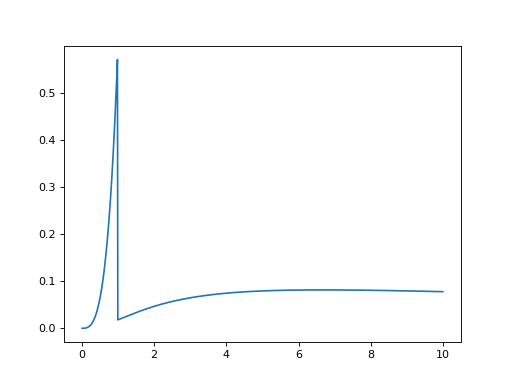

In [239]:
plt.figure()
plt.plot(zz,eh/25000)

In [240]:
P = np.zeros_like(zz)
for i in range(len(zz)):
    P[i] = np.trapz(eh[:i]/25000,x=zz[:i])

<IPython.core.display.Javascript object>


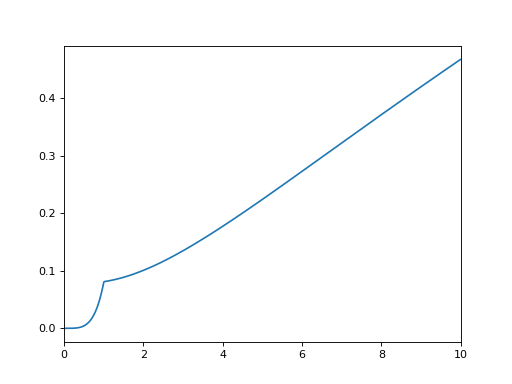

(0, 10)

In [241]:
plt.figure()
plt.plot(zz,P*25000/41253)
plt.xlim(0,10)
#plt.ylim(0,1)

In [35]:
ind

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177